In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

### Exercicios:

#### Faça a leitura do arquivo `movies.csv`

In [2]:
df_movies = pd.read_csv('movies.csv', sep='|', names=['color', 'director_name', 'num_critic_for_reviews', 'duration',
                'gross', 'movie_title', 'num_user_for_reviews', 'country',
                'cotent_rating', 'budget', 'title_year', 'imdb_score', 'genre'])

##### tratamento

In [3]:
colunas = ['num_critic_for_reviews', 'duration', 'gross', 'num_user_for_reviews',
                 'country', 'cotent_rating', 'budget', 'title_year']

df_movies[colunas] = df_movies[colunas].replace('?', np.nan)

colunas = ['country', 'cotent_rating', 'budget', 'title_year']

df_movies[colunas] = df_movies[colunas].replace(np.nan, '')
df_movies['color'] = df_movies['color'].replace('?', '')
colunas = ['budget', 'title_year']

df_movies[colunas] = df_movies[colunas].replace('', np.nan)

df_movies.head(5)

,color,director_name,num_critic_for_reviews,duration,gross,movie_title,num_user_for_reviews,country,cotent_rating,budget,title_year,imdb_score,genre
0,Color,James Cameron,723.0,178.0,760505847.0,Avatar,3054.0,USA,PG-13,"237,000,000.0",2009.0,7.9,Action
1,Color,Gore Verbinski,302.0,169.0,309404152.0,Pirates of the Caribbean: At World's End,1238.0,USA,PG-13,"300,000,000.0",2007.0,7.1,Action
2,Color,Sam Mendes,602.0,148.0,200074175.0,Spectre,994.0,UK,PG-13,"245,000,000.0",2015.0,6.8,Action
3,Color,Christopher Nolan,813.0,164.0,448130642.0,The Dark Knight Rises,2701.0,USA,PG-13,"250,000,000.0",2012.0,8.5,Action
4,,Doug Walker,NaN,NaN,NaN,Star Wars: Episode VII - The Force Awakens ...,NaN,,,NaN,NaN,7.1,Documentary


In [4]:
df_movies['num_critic_for_reviews'] = pd.to_numeric(df_movies['num_critic_for_reviews'], errors='coerce')
df_movies['duration'] = pd.to_numeric(df_movies['duration'], errors='coerce')
df_movies['gross'] = pd.to_numeric(df_movies['gross'], errors='coerce')
df_movies['num_user_for_reviews'] = pd.to_numeric(df_movies['num_user_for_reviews'], errors='coerce')
df_movies['budget'] = df_movies['budget'].str.replace(',', '').astype(float, errors='ignore')
df_movies['title_year'] = pd.to_numeric(df_movies['title_year'], errors='coerce')

In [5]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   100 non-null    object 
 1   director_name           100 non-null    object 
 2   num_critic_for_reviews  99 non-null     float64
 3   duration                99 non-null     float64
 4   gross                   97 non-null     float64
 5   movie_title             100 non-null    object 
 6   num_user_for_reviews    99 non-null     float64
 7   country                 100 non-null    object 
 8   cotent_rating           100 non-null    object 
 9   budget                  96 non-null     float64
 10  title_year              99 non-null     float64
 11  imdb_score              100 non-null    float64
 12  genre                   100 non-null    object 
dtypes: float64(7), object(6)
memory usage: 10.3+ KB


#### 1. Qual o filme com o maior lucro?

In [6]:
df_movies['profit'] = df_movies['gross'] - df_movies['budget']

max_profit_movie = df_movies.loc[df_movies['profit'].idxmax()]
lista = [f"{max_profit_movie['movie_title']}", f"${max_profit_movie['profit']:.2f}"]
print(lista[0], lista[1])

Avatar  $523505847.00


#### 2. Qual o filme que deu o maior prejuízo

In [7]:
min_profit_movie = df_movies.loc[df_movies['profit'].idxmin()]
lista = [f"{min_profit_movie['movie_title']}", f"${min_profit_movie['profit']:.2f}"]
print(lista[0], lista[1])

John Carter  $-190641321.00


#### 3. Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)

In [8]:
df_budget_by_year = df_movies.dropna(subset=['budget', 'title_year'])

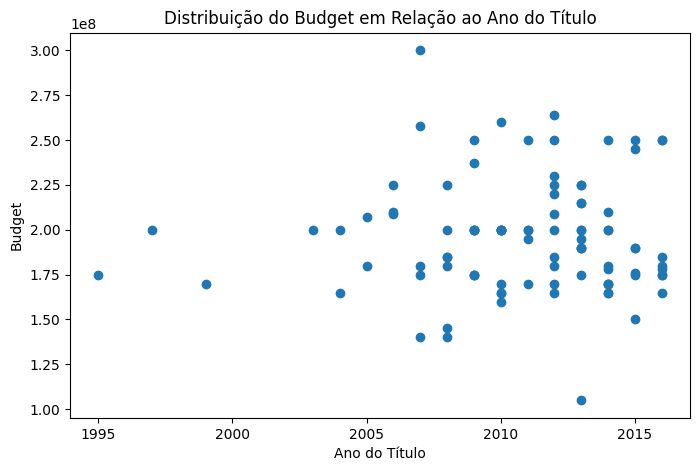

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Faça uma plotagem(gráfico) que mostre a distribuição do budget em relação ao ano do titulo(title_year)

# Filtrando valores não nulos de budget e title_year


plt.figure(figsize=(8, 5))

plt.scatter(df_budget_by_year['title_year'], df_budget_by_year['budget'])

plt.title('Distribuição do Budget em Relação ao Ano do Título')
plt.xlabel('Ano do Título')
plt.ylabel('Budget');

#### 4. Uma plotagem do genero do filme.

In [10]:
genre_avg_score = df_movies.groupby('genre')['imdb_score'].mean().sort_values(ascending=False).head(10)
genre_avg_score_df = genre_avg_score.reset_index()

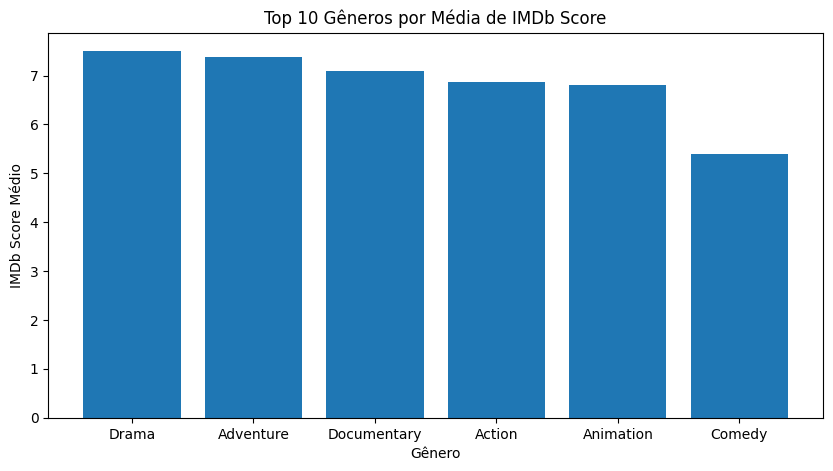

In [11]:
plt.figure(figsize=(10, 5))

plt.bar(genre_avg_score_df['genre'], height=genre_avg_score_df['imdb_score'])

plt.title('Top 10 Gêneros por Média de IMDb Score')
plt.ylabel('IMDb Score Médio')
plt.xlabel('Gênero');

#### 5. Quais os 10 melhores filmes(olha aí a lista de indicação do FDS)

In [12]:
movie_avg_score = df_movies.groupby('movie_title')['imdb_score'].mean().sort_values(ascending=False).head(10)
movie_avg_score

movie_title
The Dark Knight              9.0
Inception                    8.8
Interstellar                 8.6
The Dark Knight Rises        8.5
WALL·E                       8.4
Toy Story 3                  8.3
Inside Out                   8.3
Up                           8.3
How to Train Your Dragon     8.2
Godzilla Resurgence          8.2
Name: imdb_score, dtype: float64

#### 6. Qual o Genero mais popular e menos popular?

In [13]:
# Qual o Genero mais popular e menos popular?
genre_contagem = df_movies['genre'].value_counts()

# mais popular
most_popular_genre = genre_contagem.idxmax()
most_popular_contagem = genre_contagem.max()

# menos popular
least_popular_genre = genre_contagem.idxmin()
least_popular_contagem = genre_contagem.min()


print(f"'{most_popular_genre}' {most_popular_contagem}")
print(f"'{least_popular_genre}' {least_popular_contagem}")

'Action' 70
'Documentary' 1


#### 7. Existe relação entre os melhores filme e seu Budget?

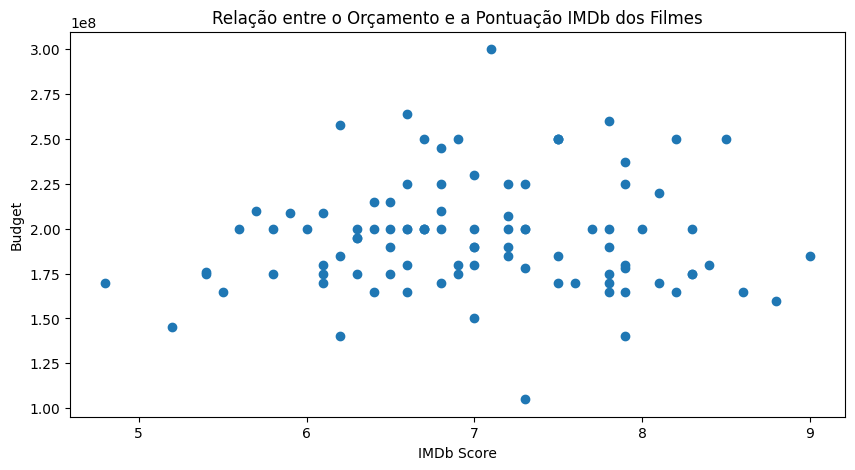

In [14]:
df_budget_score = df_movies.dropna(subset=['budget', 'imdb_score'])

plt.figure(figsize=(10, 5))


plt.scatter(df_budget_by_year['imdb_score'], df_budget_by_year['budget'])
plt.title('Relação entre o Orçamento e a Pontuação IMDb dos Filmes')
plt.xlabel('IMDb Score')
plt.ylabel('Budget');

**Análise:**<br>
não, filmes que gastaram um valor médio, acima da média ou abaixo <br>estão espalhados por todo o espectro de notas do IMDb

#### 8. Quem é o melhor diretor? Existe uma relação de custo associado ao melhor diretor? Ou seja, o melhor diretor baseado na sua analise é também o diretor que mais gasta?

In [15]:
director_scores_budgets = df_movies.groupby('director_name').agg(
    avg_imdb_score=('imdb_score', 'mean'), avg_budget=('budget', 'mean')).sort_values(by='avg_imdb_score', ascending=False)

best_director = director_scores_budgets.iloc[0]

print(f"melhor diretor: '{best_director.name}' | Média no IMDb score: {best_director['avg_imdb_score']:.2f}.")
print(f"O orçamento médio de seus filmes: ${best_director['avg_budget']:.2f} dólares.")

melhor diretor: 'Christopher Nolan' | Média no IMDb score: 8.72.
O orçamento médio de seus filmes: $190000000.00 dólares.


**Análise:**<br>
Sim, a correlação é válida, o melhor diretor é também o que mais gasta.

#### 9. Mostre num gráfico a quantidade de filmes ao passar do ano

Text(0.5, 0, 'Ano')

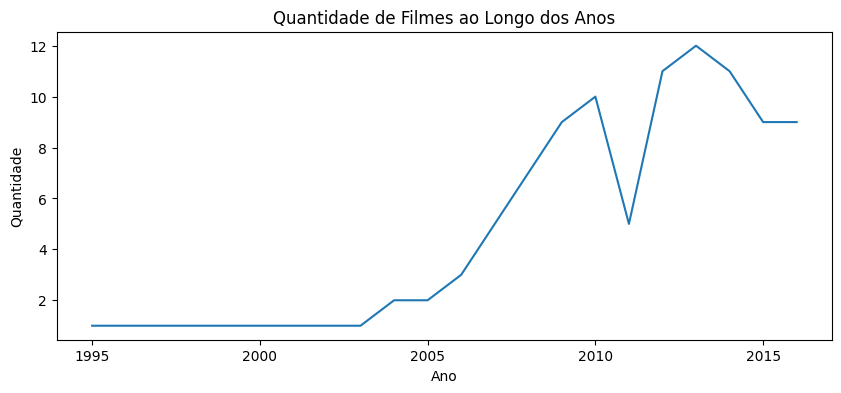

In [16]:
movies_per_year = df_movies['title_year'].value_counts().sort_index()

plt.figure(figsize=(10, 4))

plt.plot(movies_per_year.index, movies_per_year.values)

plt.title('Quantidade de Filmes ao Longo dos Anos')
plt.ylabel('Quantidade')
plt.xlabel('Ano')